In [2]:
# import python libraries
import pandoc
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [3]:
# import csv file
df = pd.read_csv(r'C:\Users\Nitin Pal\Downloads\Python_Sales_Analysis\Sales Data.csv', encoding= 'unicode_escape')

In [78]:
df.shape

(11239, 13)

In [77]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99
10,1003829,Harshita,P00200842,M,26-35,34,0,Delhi,Central,Banking,Auto,1,23770.00


In [ ]:
#drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [ ]:
#check for null values
pd.isnull(df).sum()

In [ ]:
# drop null values
df.dropna(inplace=True)

In [ ]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [ ]:
df['Amount'].dtypes

In [80]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [ ]:
#rename column
df.rename(columns= {'Marital_Status':'Shaadi'})

In [81]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610858
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [82]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610858
std,12.753866,1.114967,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

### Gender

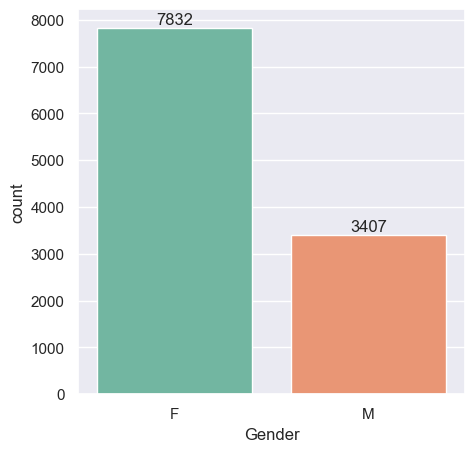

In [76]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x='Gender', data=df, hue='Gender', palette="Set2", legend=False)
sns.set(rc={'figure.figsize':(5,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

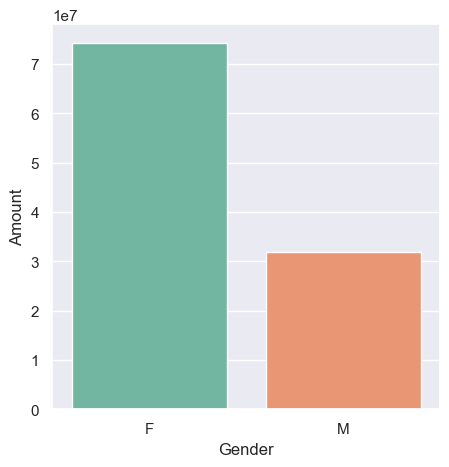

In [60]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen, hue='Gender', palette="Set2", legend=False)

*The analysis of the graphs reveals a significant insight: a higher proportion of buyers are female, indicating that women are more actively engaged in purchasing decisions. Furthermore, the data suggests that women exhibit a stronger purchasing power compared to men, as reflected in the higher frequency and value of transactions made by female buyers. This trend highlights the importance of targeting and tailoring marketing strategies to cater to the preferences and purchasing behavior of female consumers, who are evidently driving a substantial portion of the market demand.*

### Age

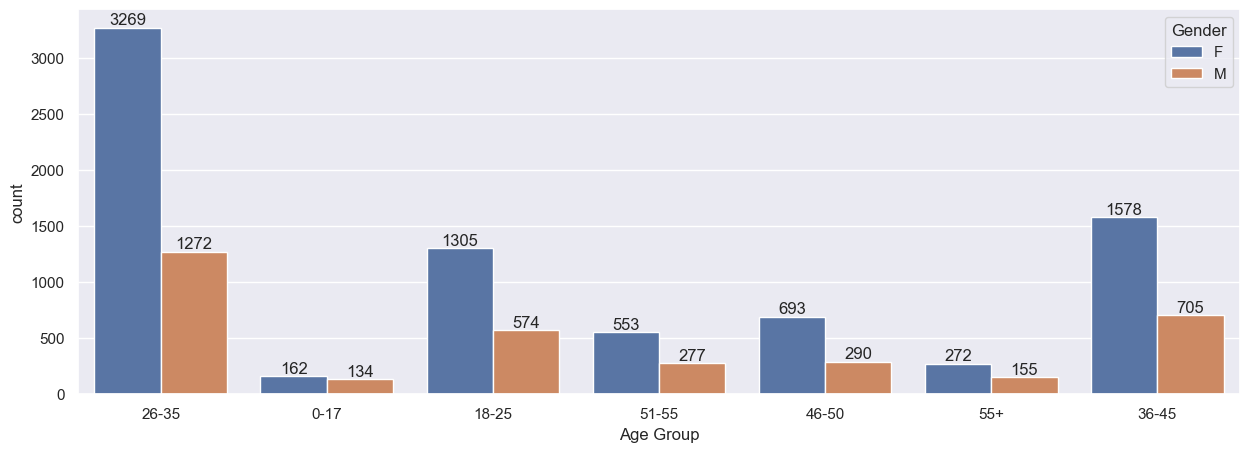

In [24]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

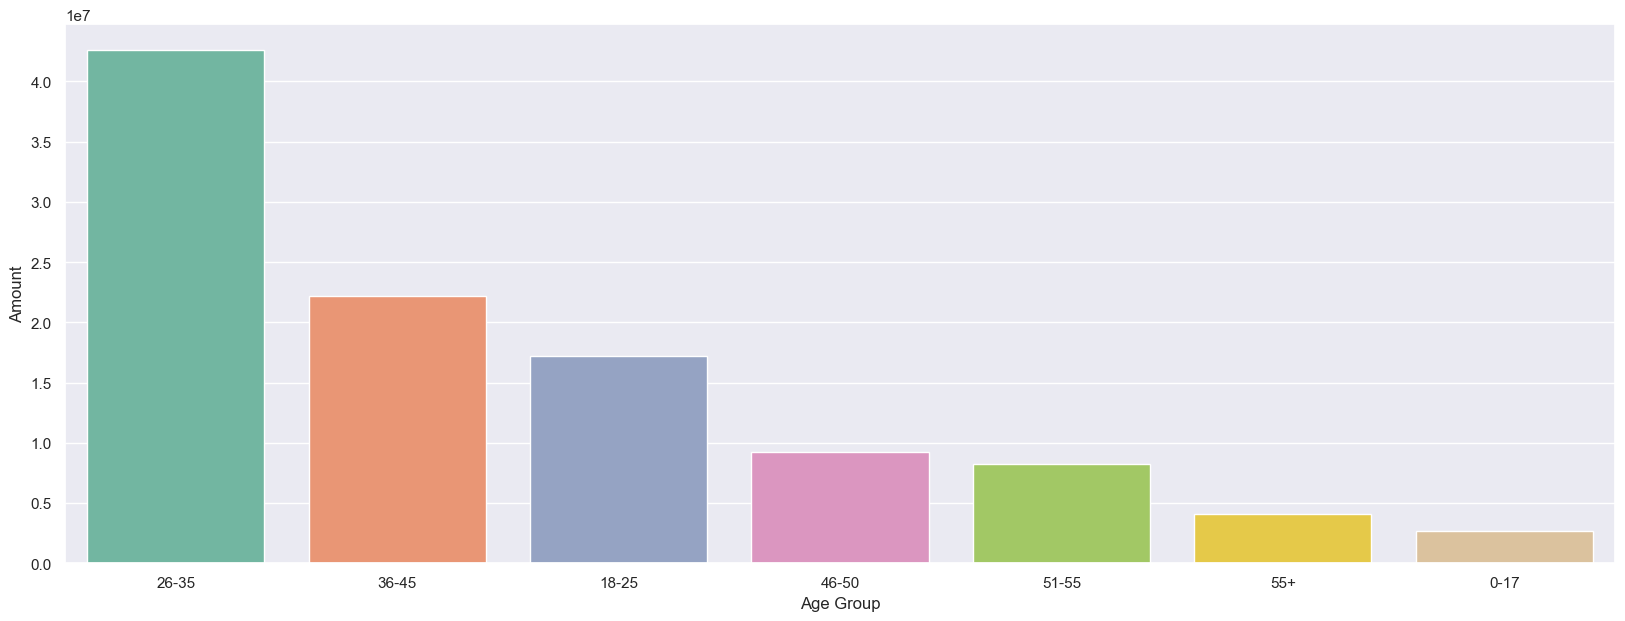

In [69]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(20,7)})
sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age, hue='Age Group', palette="Set2", legend=False)

*The analysis of the graphs indicates that the majority of buyers fall within the 26-35 age group, with a significant proportion being female. This demographic not only dominates the consumer base but also plays a crucial role in driving purchasing trends. The prominence of women in this age group suggests that they are key decision-makers and influencers in the market. Understanding the preferences and behaviors of this segment is essential for developing targeted marketing strategies and product offerings that resonate with their needs and interests.*

### State

<Axes: xlabel='State', ylabel='Orders'>

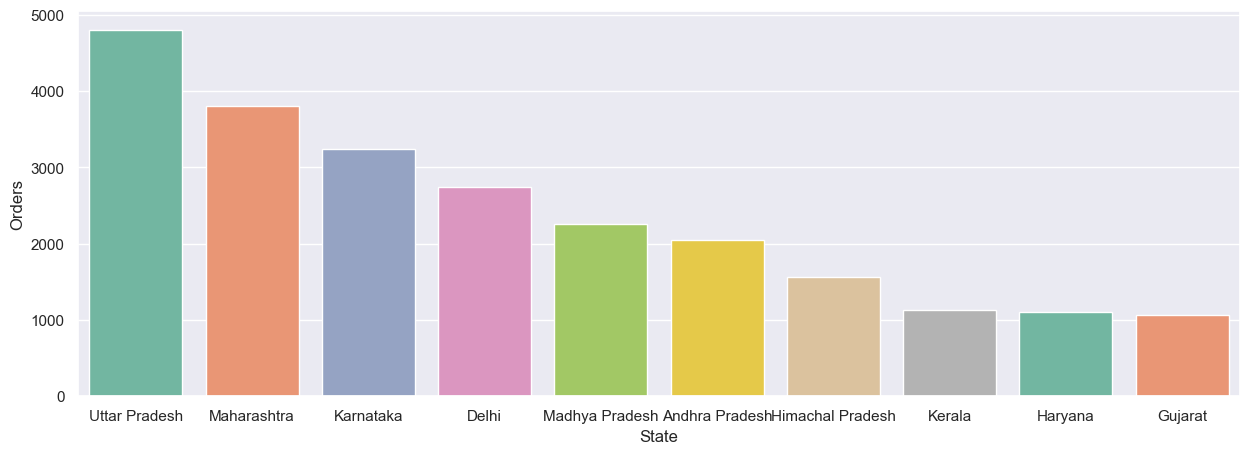

In [47]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders', hue='State', palette="Set2", legend=False)

<Axes: xlabel='State', ylabel='Amount'>

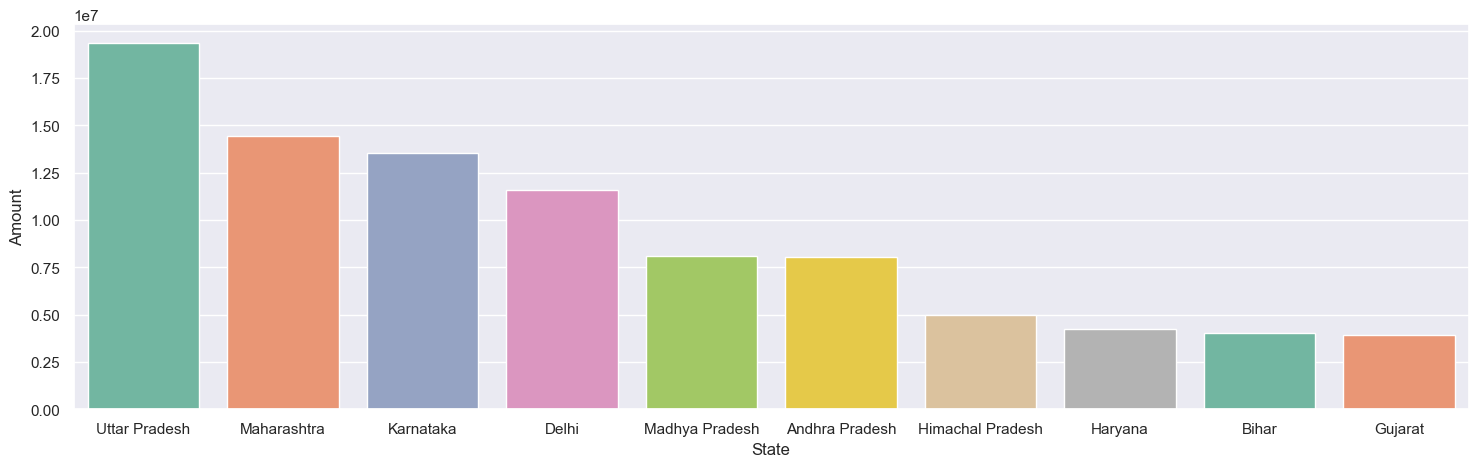

In [46]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(18,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount', hue='State', palette="Set2", legend=False)

*The analysis of the graphs reveals that the majority of orders and the highest total sales amounts are concentrated in the states of Uttar Pradesh, Maharashtra, and Karnataka. Uttar Pradesh leads in the number of orders, indicating a robust consumer base, while Maharashtra and Karnataka show significant contributions in terms of total sales value. This distribution underscores the economic vitality and purchasing power in these regions, making them critical markets for targeted sales strategies. Companies should consider focusing their marketing efforts and resources on these key states to maximize revenue and capture market share effectively.*

### Marital Status

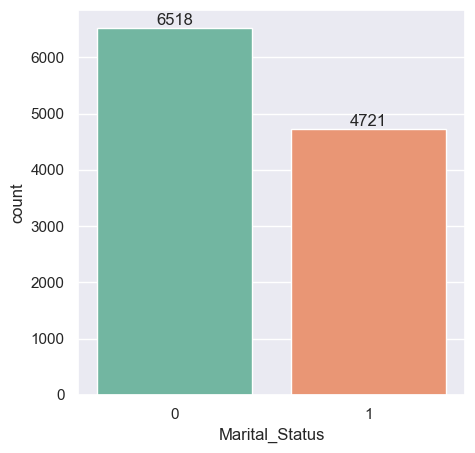

In [58]:
ax = sns.countplot(data = df, x = 'Marital_Status', hue='Marital_Status', palette="Set2", legend=False)

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

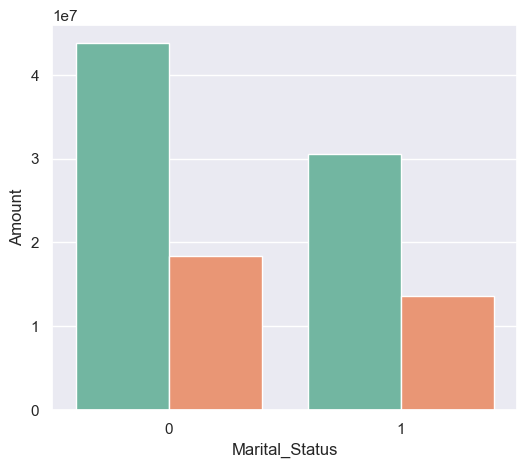

In [43]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender', palette="Set2", legend=False)

*The analysis of the graphs indicates that a substantial proportion of buyers are married women, highlighting this demographic's significant presence in the market. Additionally, these married women exhibit a high level of purchasing power, as evidenced by their substantial expenditure and transaction volumes. This insight underscores the importance of targeting marketing and sales strategies to this key segment, as they not only represent a major consumer base but also possess considerable financial resources. Tailoring product offerings and promotional efforts to meet the needs and preferences of married women could enhance engagement and drive sales growth.*

### Occupation

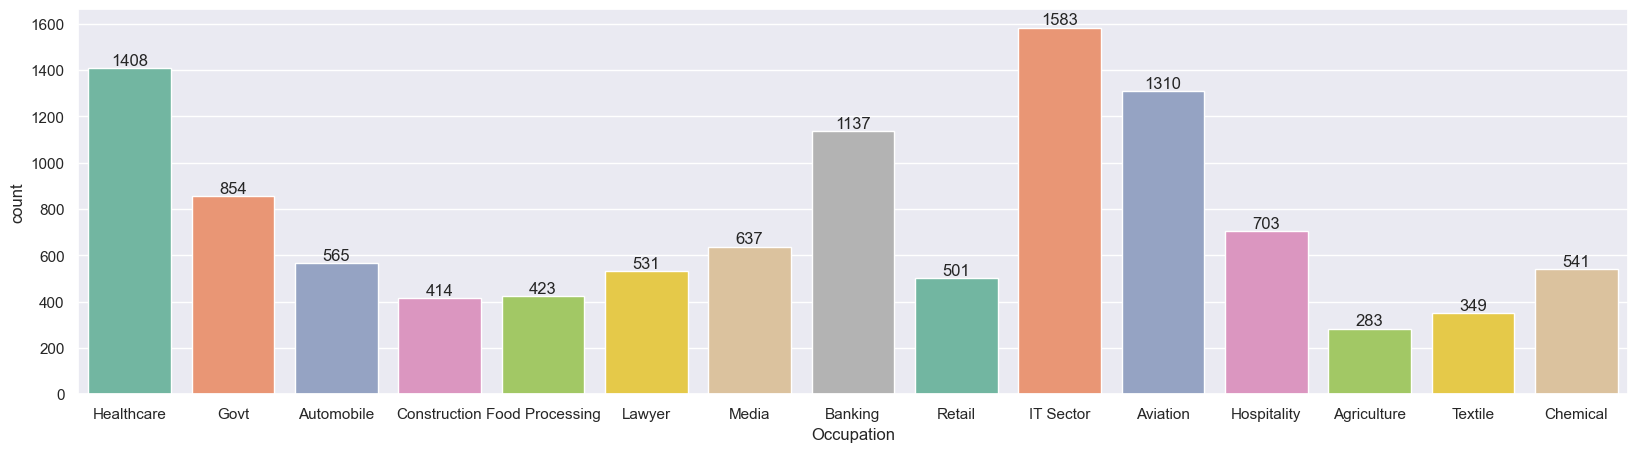

In [39]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation', hue='Occupation', palette="Set2", legend=False)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

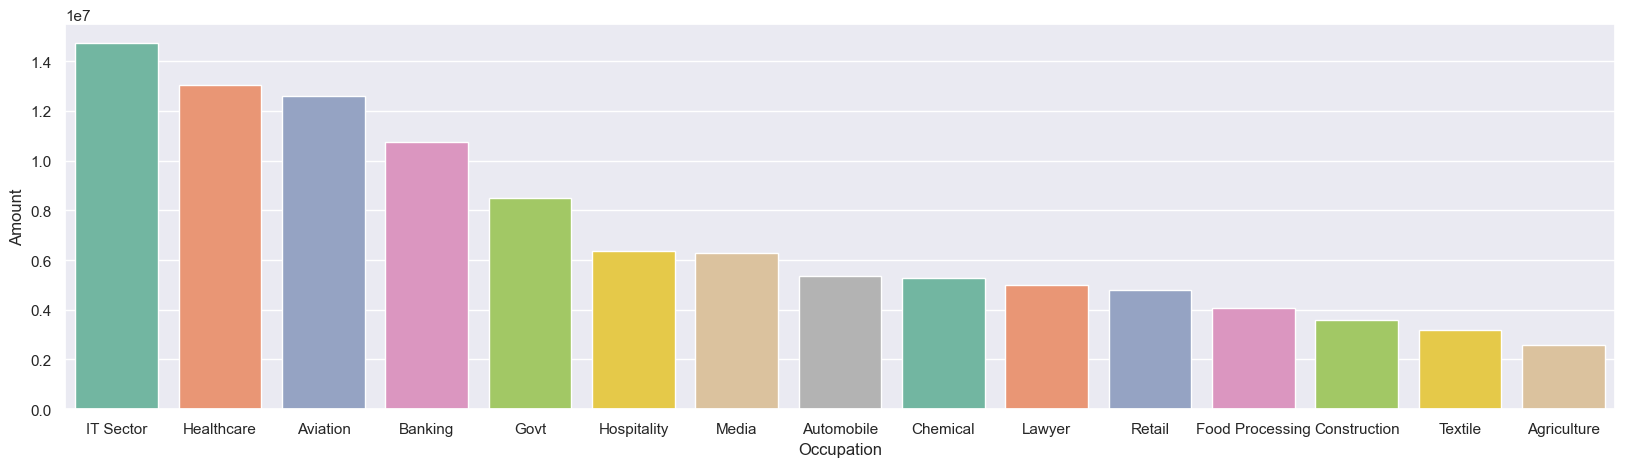

In [37]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount', hue='Occupation', palette="Set2", legend=False)

*The analysis of the graphs reveals that the majority of buyers are employed in the IT, healthcare, and aviation sectors. This distribution highlights these industries as key contributors to the consumer base. The prevalence of buyers from these sectors suggests a significant concentration of purchasing activity among professionals in these fields. Understanding the specific needs and preferences of individuals in IT, healthcare, and aviation can inform targeted marketing strategies and product development, ensuring that offerings are well-aligned with the demands of this influential consumer group.*

### Product Category

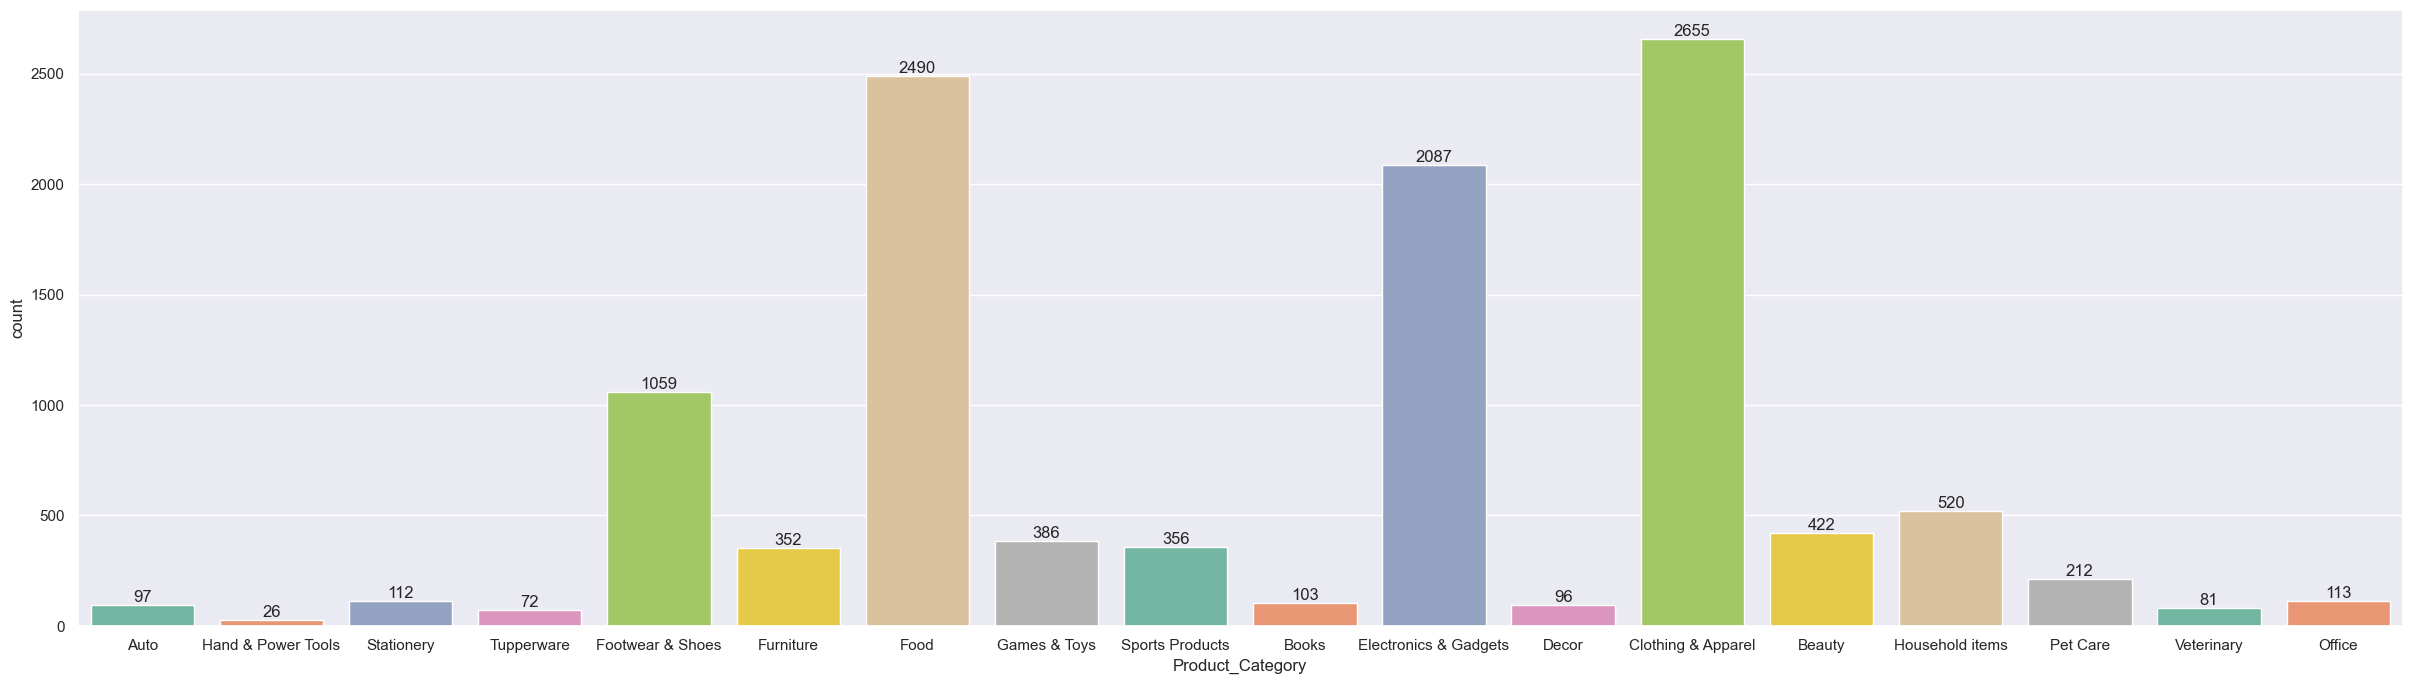

In [36]:
sns.set(rc={'figure.figsize':(30,8)})
ax = sns.countplot(data = df, x = 'Product_Category', hue='Product_Category', palette="Set2", legend=False)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

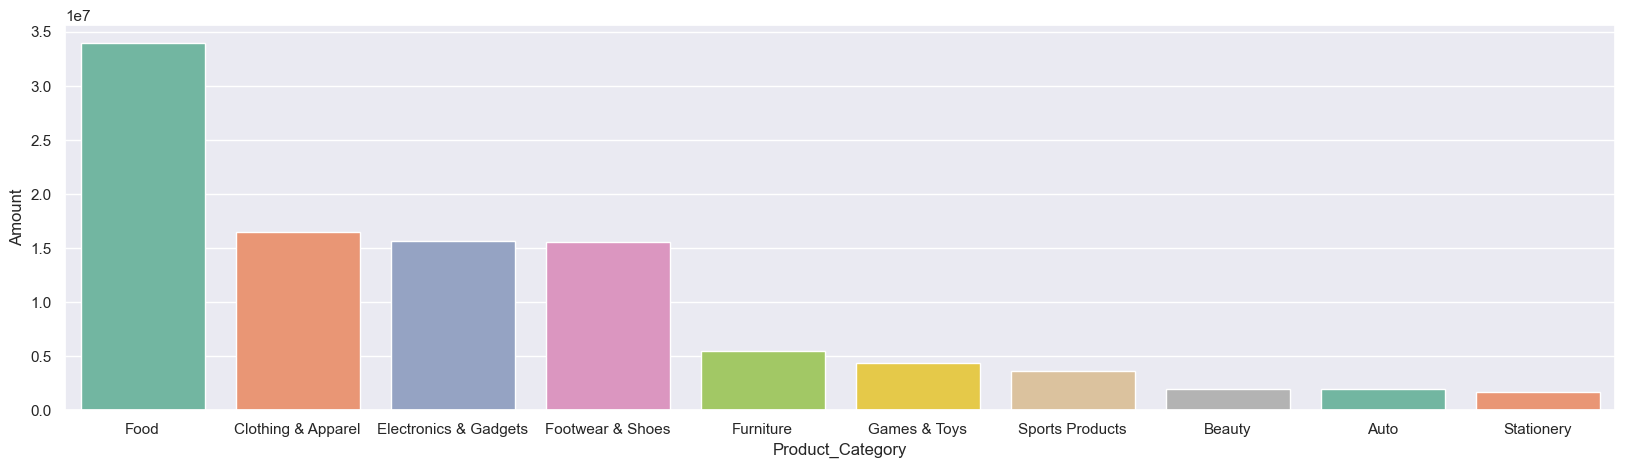

In [34]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount', hue='Product_Category', palette="Set2", legend=False)

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

<Axes: xlabel='Product_ID', ylabel='Orders'>

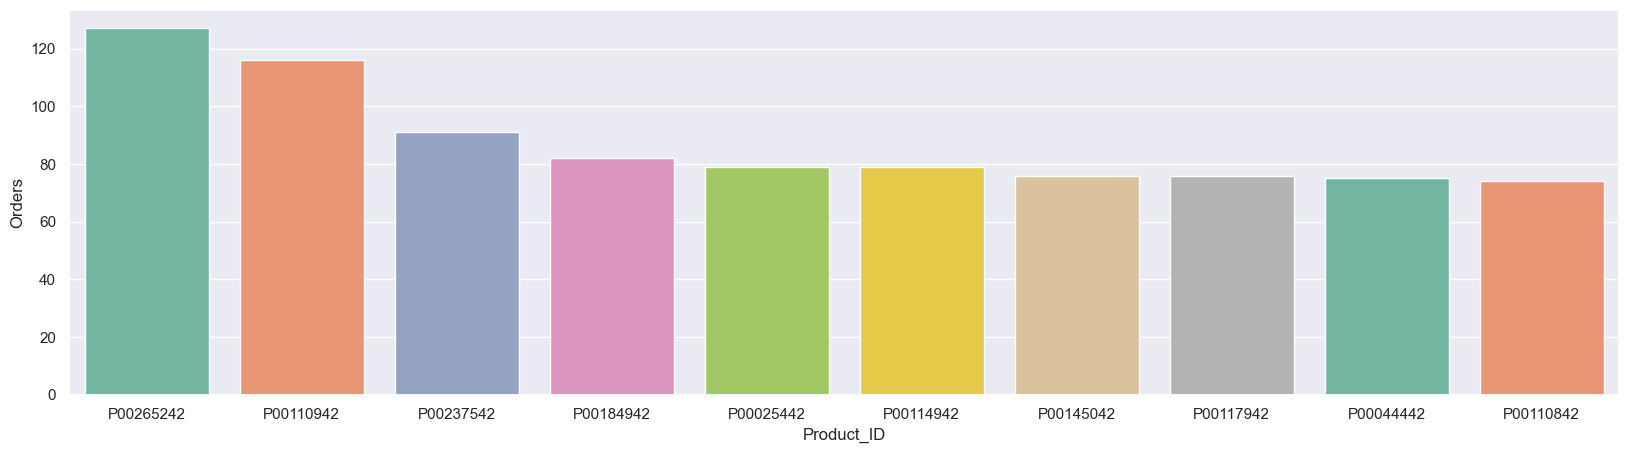

In [32]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders', hue='Product_ID', palette="Set2", legend=False)

<Axes: xlabel='Product_ID'>

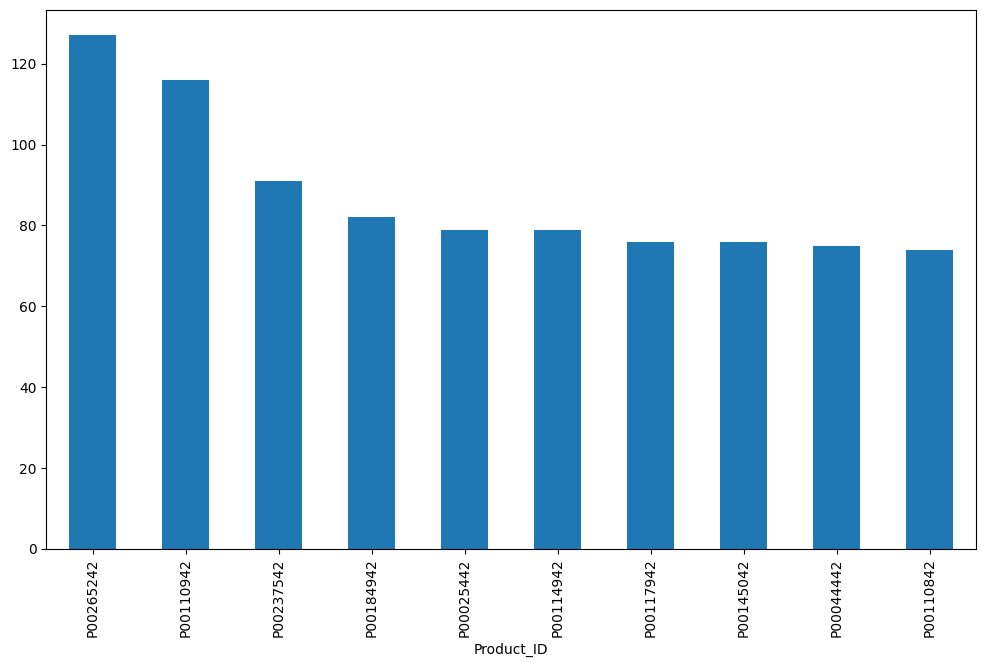

In [11]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

## Conclusion:

### 

Married women aged 26 to 35, residing in Uttar Pradesh, Maharashtra, and Karnataka, and employed in the IT, healthcare, and aviation sectors, demonstrate a higher propensity to purchase products within the food, clothing, and electronics categories. This demographic's purchasing behavior indicates a strong preference for these specific product categories, making them a key target market for businesses operating in these industries.